In [1]:
%matplotlib inline

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


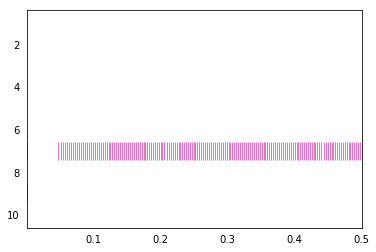

In [25]:
import nengo
from nengo.utils.matplotlib import rasterplot

import matplotlib.pyplot as plt

with nengo.Network() as model:
    stim = nengo.Node(output=1)
    x = nengo.Ensemble(10, 1)
    inhibit = nengo.Node(size_in=x.n_neurons, output=lambda _, a: a - a.sum())
    
    nengo.Connection(stim, x, synapse=None)
    nengo.Connection(x.neurons, inhibit, synapse=0.01)
    nengo.Connection(inhibit, x.neurons, synapse=None)
    
    p = nengo.Probe(x.neurons, 'spikes')
    
with nengo.Simulator(model) as sim:
    sim.run(0.5)
    
rasterplot(sim.trange(), sim.data[p])
plt.show()